# Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 

plt.style.use('fivethirtyeight')

!pwd

/home/nicovaz/Desktop/Galvanize/capstone/Grit_study_EDA


In [2]:
df = pd.read_csv("./Grit_data/data.csv", sep="\t") 

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          4226 non-null   object
 1   surveyelapse     4270 non-null   int64 
 2   GS1              4270 non-null   int64 
 3   GS2              4270 non-null   int64 
 4   GS3              4270 non-null   int64 
 5   GS4              4270 non-null   int64 
 6   GS5              4270 non-null   int64 
 7   GS6              4270 non-null   int64 
 8   GS7              4270 non-null   int64 
 9   GS8              4270 non-null   int64 
 10  GS9              4270 non-null   int64 
 11  GS10             4270 non-null   int64 
 12  GS11             4270 non-null   int64 
 13  GS12             4270 non-null   int64 
 14  VCL1             4270 non-null   int64 
 15  VCL2             4270 non-null   int64 
 16  VCL3             4270 non-null   int64 
 17  VCL4             4270 non-null   

### 62 items, 13 item vocabulary checklist, ~20 demographic variables

This dataset has around 4720 observations in it with 98 columns and it is a mix between categorical and numerical values. How different are high grit individuals in dealing with failure than low grit individuals? If someone is low grit what metric leads to that low grit the most? What metric predicts high grit the most? Does getting married effect grit at all? Does being lefty effect grit? Does relligon correlate with grit?

BONUS - Often the most interesting studies come from combining multiple sources of information. If you can scrape multiple websites, your datasets will be even more impressive to hiring managers.



Day 3 

1. OLS - regression
### normal resituals
### independent resutuals
### hedroscadisity 



Day


Thought - maybe I could use data from the big five personality test from another dataset and see if I could predict thier grit. To do this before I decided the important columns I must divide the data into k -folds. or at least test and validation set. https://www.kaggle.com/tunguz/big-five-personality-test/notebooks?sortBy=hotness&group=everyone&pageSize=20&datasetId=516764&outputType=all

try to find people with certain browsers and there agreeableness score
try to find people with certain agreeableness and grit 
agreeableness and age
acutally why can't I do all info data and differnt big factor scales

 Does getting married effect grit at all? 
 
 Does being lefty effect grit? 
 
 Does time spend taking test correlate with grit?
 

Does having a non default browser corelate with more grit?



In [4]:
df.head()
# looked for null values and found 44 in the country column. 
df = df[df['country'].notnull()]


In [5]:
def get_fives(df,types):
    cols = []
    q = types
    for (colName, colData) in df.iteritems():
        if str(colName[0]) in q:
            cols.append(colName)
    df2 = df[cols].copy()
    df2["Total"] = df2.sum(axis=1)
    return df2
fives_df = get_fives(df,'ENACO')


def get_extra(df):
    cols = []
    for (colName, colData) in df.iteritems():
        if str(colName).isalpha():
            cols.append(colName)
    return df[cols]
info_df = get_extra(df)
info_df.head()



,country,surveyelapse,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,4,3,2,2,28,1,1,1,4,1,1,2,Windows,Chrome,1366,768,69590,307
1,US,120,2,3,2,1,19,1,6,1,4,2,1,3,Macintosh,Chrome,1280,800,33657,134
2,US,99,1,2,2,2,16,1,0,1,1,2,1,3,Windows,Firefox,1920,1080,95550,138
3,KE,5098,3,2,2,1,30,1,6,1,3,1,1,6,Windows,Chrome,1600,900,4,4440
4,JP,340,4,2,1,2,38,1,2,1,1,2,2,3,Windows,Firefox,1920,1080,3,337


In [6]:
gs_df = get_fives(df ,'GS')
gs_df.info()
gs_df.head()
gs_df_scored = gs_df['Total']/12
gs_df_scored.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 4269
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GS1     4226 non-null   int64
 1   GS2     4226 non-null   int64
 2   GS3     4226 non-null   int64
 3   GS4     4226 non-null   int64
 4   GS5     4226 non-null   int64
 5   GS6     4226 non-null   int64
 6   GS7     4226 non-null   int64
 7   GS8     4226 non-null   int64
 8   GS9     4226 non-null   int64
 9   GS10    4226 non-null   int64
 10  GS11    4226 non-null   int64
 11  GS12    4226 non-null   int64
 12  Total   4226 non-null   int64
dtypes: int64(13)
memory usage: 462.2 KB


0    2.333333
1    2.250000
2    3.250000
3    2.500000
4    2.750000
Name: Total, dtype: float64

In [7]:
vcl_df = get_fives(df,"V")
vcl_df.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,Total
0,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,10
1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,11
2,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,11
3,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,8
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,4


In [8]:
# validity using the vocab words that dont exist
vcl_df[vcl_df['VCL6'] == 1]
vcl_df[vcl_df['VCL9'] == 1]
vcl_df[vcl_df['VCL12']== 1]


,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,Total
7,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,11
28,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
34,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,8
58,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,12
65,1,1,1,1,1,1,0,0,0,1,0,1,0,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,1,9
4262,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,14
4264,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,0,7
4267,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,14


In [9]:
fives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 4269
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   E1      4226 non-null   int64
 1   E2      4226 non-null   int64
 2   E3      4226 non-null   int64
 3   E4      4226 non-null   int64
 4   E5      4226 non-null   int64
 5   E6      4226 non-null   int64
 6   E7      4226 non-null   int64
 7   E8      4226 non-null   int64
 8   E9      4226 non-null   int64
 9   E10     4226 non-null   int64
 10  N1      4226 non-null   int64
 11  N2      4226 non-null   int64
 12  N3      4226 non-null   int64
 13  N4      4226 non-null   int64
 14  N5      4226 non-null   int64
 15  N6      4226 non-null   int64
 16  N7      4226 non-null   int64
 17  N8      4226 non-null   int64
 18  N9      4226 non-null   int64
 19  N10     4226 non-null   int64
 20  A1      4226 non-null   int64
 21  A2      4226 non-null   int64
 22  A3      4226 non-null   int64
 23  A4      4226 

In [10]:
fives_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,Total
0,2,2,3,4,5,1,2,4,4,4,...,2,4,1,4,2,5,4,5,4,156
1,4,2,5,3,5,2,4,2,5,4,...,2,5,2,4,1,4,3,4,5,176
2,1,5,2,4,3,2,1,5,2,5,...,2,4,2,4,3,5,5,4,4,165
3,3,5,2,4,3,4,3,5,1,5,...,2,3,2,4,1,4,2,5,4,153
4,1,5,1,5,2,5,1,5,1,4,...,3,2,2,3,3,4,1,3,2,140


In [11]:
pos_questions = [ 
    'E1','E3','E5','E7','E9',                       # 5
    'N1','N3','N5','N6','N7','N8','N9','N10', # 8
    'A2','A4','A6','A8','A9','A10',               # 6
    'C1','C3','C5','C7','C9','C10',               # 6
    'O1','O3','O5','O7','O8','O9','O10',        # 7
]

neg_questions = [ 
    'E2','E4','E6','E8','E10', # 5
    'N2','N4',                       # 2
    'A1','A3','A5','A7',         # 4
    'C2','C4','C6','C8',         # 4
    'O2','O4','O6',                # 3
]

In [12]:
fives_scored = fives_df.drop('Total', axis =1)

fives_scored[pos_questions] = fives_df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
fives_scored[neg_questions] = fives_df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

In [13]:
fives_scored.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-1,1,0,-1,2,2,-1,-1,1,-1,...,2,1,1,2,1,1,2,1,2,1
1,1,1,2,0,2,1,1,1,2,-1,...,1,1,2,1,1,2,1,0,1,2
2,-2,-2,-1,-1,0,1,-2,-2,-1,-2,...,1,1,1,1,1,0,2,2,1,1
3,0,-2,-1,-1,0,-1,0,-2,-2,-2,...,2,1,0,1,1,2,1,-1,2,1
4,-2,-2,-2,-2,-1,-2,-2,-2,-2,-1,...,2,0,-1,1,0,0,1,-2,0,-1


In [14]:
Extroversion_df = get_fives(fives_scored,'E')

In [15]:
Neuroticism_df = get_fives(fives_scored,"N")
Neuroticism_df.head()


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,Total
0,-1,0,1,1,0,-1,0,0,-1,1,0
1,2,1,2,0,0,1,2,2,2,0,12
2,1,0,1,0,1,1,1,0,1,-1,5
3,-2,-2,0,0,-1,0,-2,-2,-1,-2,-12
4,1,2,2,0,2,1,-2,-2,1,0,5


In [16]:
Agreeableness_df= get_fives(fives_scored,"A")
Agreeableness_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Total
0,2,2,1,2,2,1,1,1,1,0,13
1,-2,1,2,1,1,2,2,1,0,1,9
2,0,0,2,0,0,1,-1,1,0,0,3
3,2,1,2,2,-1,2,1,2,2,1,14
4,1,0,1,0,1,0,1,-1,-1,1,3


In [17]:
Conscientiousness_df = get_fives(fives_scored,"C")
Conscientiousness_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Total
0,-1,-1,1,0,-1,-1,0,1,-1,1,-2
1,1,0,1,0,-2,0,2,1,2,0,5
2,-1,1,1,1,0,-1,2,0,0,1,4
3,1,2,2,2,1,2,1,2,1,0,14
4,0,2,0,2,1,1,0,1,0,1,8


In [18]:
Openness_df = get_fives(fives_scored,"O")
Openness_df.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,Total
0,2,1,1,2,1,1,2,1,2,1,14
1,1,1,2,1,1,2,1,0,1,2,12
2,1,1,1,1,1,0,2,2,1,1,11
3,2,1,0,1,1,2,1,-1,2,1,10
4,2,0,-1,1,0,0,1,-2,0,-1,0


In [19]:
types_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']

In [20]:
def vis_fives_type(df,columns_of_questions, xlim=-25, ylim=25, col='Total',bins_=15):
    fig, axs = plt.subplots()

    axs.hist(df[col], bins=bins_)
    axs.set_title(columns_of_questions)
    axs.set_xlabel('Score')
    axs.set_ylabel('Count')
    axs.set_xlim(xlim,ylim);


# vis_fives_type(Openness_df,"IPIP Openness Score",bins_=15)
# vis_fives_type(Extroversion_df,"IPIP Extroversion Score")
# vis_fives_type(Agreeableness_df, "IPIP Agreeableness Score")
# vis_fives_type(Conscientiousness_df, "IPIP Conscientiousness Score")
# vis_fives_type(Neuroticism_df, "IPIP Neuroticism Score")
# vis_fives_type(fives_scored.sum(axis=1), "All Questions", xlim=-20, ylim=100)

In [21]:
#sns.heatmap(totals_df)


totals_df = (pd.DataFrame({"Openness":Openness_df['Total'],
                           "Neuroticism": Neuroticism_df["Total"],
                           "Conscientiousness":Conscientiousness_df["Total"],
                          "Extroversion": Extroversion_df['Total'],
                          "Agreeableness": Agreeableness_df['Total']}))
#grab_totals([Openness_df,Extroversion_df, Neuroticism_df,Conscientiousness_df,Agreeableness_df])

In [22]:
totals_df.head()


,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness
0,14,0,-2,1,13
1,12,12,5,10,9
2,11,5,4,-12,3
3,10,-12,14,-11,14
4,0,5,8,-18,3


In [23]:
totals_df.corr()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness
Openness,1.000000,-0.103572,0.073269,0.190378,0.138555
Neuroticism,-0.103572,1.000000,-0.237920,-0.251893,-0.106166
Conscientiousness,0.073269,-0.237920,1.000000,0.083123,0.158966
Extroversion,0.190378,-0.251893,0.083123,1.000000,0.299411
Agreeableness,0.138555,-0.106166,0.158966,0.299411,1.000000


The test makers did a good job in making sure that each trait was signficalty differnt from each other to make it so that none of the traits are correlated. 

In [24]:
def info_graph(df,col, colname, bins_=20, xlabel='f', ylabel='f'):
    fig, axs = plt.subplots()

    axs.hist(df[col], bins=bins_)
    axs.set_title(colname)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.legend();
    


In [25]:

stats.normaltest(totals_df)

NormaltestResult(statistic=array([124.04441298, 144.09740768,  73.17556711, 242.31166474,
       441.06954017]), pvalue=array([1.15903877e-27, 5.12442916e-32, 1.28862780e-16, 2.41374035e-53,
       1.67096089e-96]))

In [26]:
total_df = totals_df.join(gs_df[['Total']])

In [27]:
total_df.corr()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total
Openness,1.000000,-0.103572,0.073269,0.190378,0.138555,-0.223544
Neuroticism,-0.103572,1.000000,-0.237920,-0.251893,-0.106166,-0.049514
Conscientiousness,0.073269,-0.237920,1.000000,0.083123,0.158966,0.009826
Extroversion,0.190378,-0.251893,0.083123,1.000000,0.299411,-0.142997
Agreeableness,0.138555,-0.106166,0.158966,0.299411,1.000000,-0.069838
Total,-0.223544,-0.049514,0.009826,-0.142997,-0.069838,1.000000


In [28]:
total_bio = total_df.join(info_df)
total_bio.head()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total,country,surveyelapse,education,urban,...,race,voted,married,familysize,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,14,0,-2,1,13,28,RO,174,4,3,...,4,1,1,2,Windows,Chrome,1366,768,69590,307
1,12,12,5,10,9,27,US,120,2,3,...,4,2,1,3,Macintosh,Chrome,1280,800,33657,134
2,11,5,4,-12,3,39,US,99,1,2,...,1,2,1,3,Windows,Firefox,1920,1080,95550,138
3,10,-12,14,-11,14,30,KE,5098,3,2,...,3,1,1,6,Windows,Chrome,1600,900,4,4440
4,0,5,8,-18,3,33,JP,340,4,2,...,1,2,2,3,Windows,Firefox,1920,1080,3,337


In [29]:
total_bio.drop(['screenh','screenw'], axis = 1)

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total,country,surveyelapse,education,urban,...,religion,orientation,race,voted,married,familysize,operatingsystem,browser,introelapse,testelapse
0,14,0,-2,1,13,28,RO,174,4,3,...,1,1,4,1,1,2,Windows,Chrome,69590,307
1,12,12,5,10,9,27,US,120,2,3,...,6,1,4,2,1,3,Macintosh,Chrome,33657,134
2,11,5,4,-12,3,39,US,99,1,2,...,0,1,1,2,1,3,Windows,Firefox,95550,138
3,10,-12,14,-11,14,30,KE,5098,3,2,...,6,1,3,1,1,6,Windows,Chrome,4,4440
4,0,5,8,-18,3,33,JP,340,4,2,...,2,1,1,2,2,3,Windows,Firefox,3,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,-1,11,0,-14,15,33,US,114,2,1,...,1,1,4,2,1,1,Windows,Chrome,2,175
4266,-5,12,-7,-9,-16,46,CA,158,3,2,...,1,1,4,1,2,4,Windows,Chrome,8,156
4267,12,-7,-6,5,17,35,US,208,3,2,...,2,3,4,1,1,2,Linux,Chrome,42,154
4268,0,19,-1,-18,6,35,US,128,2,1,...,12,4,5,2,1,3,ChromeOS,Chrome,47,140


In [305]:
total_bio2 = total_bio[total_bio['surveyelapse'] < 600]
stats.normaltest(total_bio2['surveyelapse'])
# total_bio2 = total_bio[total_bio['introelapse'] < 200]
# total_bio2 = total_bio[total_bio['testelapse'] < 700]
total_bio2 = total_bio2[total_bio2['Total'] > 12]
total_bio2['Total']

0       28
1       27
2       39
4       33
5       31
        ..
4265    33
4266    46
4267    35
4268    35
4269    24
Name: Total, Length: 4088, dtype: int64

# Bayes 

day 4 

1. I started with the same questions as before lefty vs righty. 
2. First I gotta get the beta distribution parameters in order to do that I must seperate the two groups from my sample. once I did that I had 421 lefties and 3552 righties. I didn't like this sample differnce for this test so I once again decided to bootstrap but this time I decided to make this a fair fight, and made each sample for the two groups the same at 5000 points becuase the more samples we have (i.e. the larger (𝛼+𝛽)), then the smaller the variance of our beta distribution will be. I also bootstraped the grit scores of both groups together to have an base to compare too. I resampled each group 1000 times.
3. Once I had the 3 groups all ready to go I got the means of each indivudiual resample, leaving me with 1000 sample means for all 3 groups. In order to get the Beta Distribution, we need a success rate for lefties and righties having a higher sample mean than the base group. 

The mean of the resample means are: 
30.85957588 mean total group 
30.928131240000006 mean lefty group
30.89992032 mean righty group 


4. lefty parameters (a = 770, b = 230, mean = 0.77, Success = 770, total = 1000) 
    righty parameters (a = 663, b=  337, mean = 0.663, Success = 663, total =1000)

5. Graph the PDF of the distribution created from the parameters. On the y-axis of we have probability density, and on the x-axis of distribution we have probabilities Success rates). So we have relative probability of the Success rates of lefties and righties grit beating out the average mean.

Put all this together, the beta distribution models the probability of the success rate of having a higher grit score sample mean (which we are trying to figure out from our data). 

6. Back to the question at 'hand': What's the probability that lefties score better than righties?

### why is one graph taller than the other. Because we are more sure where the mean is in the data set with the smaller original size that was just resampled a bunch rather than the righty data set. 



Let's figure out how much of site B's Beta distribution is to the right of site A's.

Lets run a quick monte Carlo simulation. To do this I draw a large number of random samles from each distribution created above. I can then count the amount of times lefty samples are greater than righties. I can do this 10,000 times within seconds with a computer. 



checking restults
qqplot for normal residuals


In [308]:
gs_lefty = total_bio2[total_bio2['hand'] == 2] # 421
gs_righty = total_bio2[total_bio2['hand'] == 1] # 3552

In [336]:
total_bio2['Total'].mean()
gs_lefty['Total'].mean()
gs_righty["Total"].mean()
total_bio2.

30.898085585585587

In [338]:
total_bio2[total_bio2['hand'] == 3]["Total"].mean()

29.11764705882353

In [270]:
def bootstrap(x, resamples=1000, size_=5000):
    bootstrap_samples = []
    for i in range(0,resamples):
        bootstrap_samples.append(np.random.choice(x, size=size_, replace=True))
    return bootstrap_samples

def bootstrap_stat(bt_sample, stat_function=np.mean):
    mapped_data = []
    for i in range(0,1000):
        bootstrap_sample_stats = stat_function(bt_sample[i])
        mapped_data.append(bootstrap_sample_stats)
    return mapped_data

#bootstrap from each sample.mean of each bootstrap, then subtract mean.
#recorded diffences in means.
# bt_gs = bootstrap(gs_df['Total'])
# bt_mean_gs = bootstrap_stat(bt_gs)
# bt_mean_gs


In [321]:
# bootstrap 1000 times and find the mean for grit score of everybody
bt_group_total = bootstrap_stat(bootstrap(total_bio2['Total']))
np.mean(bt_group_total)

30.8598076

In [319]:
# bootstrap 1000 times and find the mean for grit score of lefty group
bt_bayes_lefty = bootstrap_stat(bootstrap(gs_lefty['Total']))
np.mean(bt_bayes_lefty)

30.931155399999998

In [322]:
# bootstrap 1000 times and find the mean for grit score of righty group
bt_bayes_righty = bootstrap_stat(bootstrap(gs_righty['Total']))
np.mean(bt_bayes_righty)

30.898762199999997

In [339]:
bt_bayes_righty

[30.969,
 31.0228,
 31.0968,
 31.0682,
 30.8292,
 30.8942,
 30.9646,
 30.8878,
 30.923,
 30.8348,
 30.9114,
 30.9716,
 30.8898,
 30.8394,
 30.8632,
 30.918,
 30.8574,
 30.9974,
 30.9112,
 30.8484,
 30.9048,
 30.8798,
 30.9066,
 30.8596,
 30.901,
 30.9946,
 30.877,
 30.906,
 30.8842,
 30.7584,
 30.8444,
 30.838,
 30.8958,
 30.7186,
 30.9628,
 30.966,
 30.874,
 30.8728,
 30.9388,
 30.8788,
 30.8708,
 31.0228,
 30.9396,
 30.9964,
 30.7824,
 30.887,
 30.8568,
 30.9046,
 30.8378,
 30.8428,
 31.1604,
 30.9308,
 30.8902,
 30.9152,
 30.8244,
 30.9472,
 30.8492,
 30.9094,
 30.9468,
 30.8332,
 30.7576,
 30.8918,
 30.97,
 30.9072,
 30.9236,
 30.848,
 30.81,
 30.9456,
 30.893,
 30.9208,
 30.9458,
 30.9422,
 30.8724,
 31.0546,
 30.9664,
 30.8066,
 30.9212,
 30.8642,
 30.8412,
 30.9336,
 31.0256,
 30.8968,
 30.9294,
 30.8392,
 30.905,
 30.849,
 30.892,
 30.8448,
 30.825,
 30.9078,
 30.8014,
 30.8308,
 30.9214,
 30.8106,
 30.9574,
 30.9554,
 30.8768,
 31.0024,
 30.8472,
 30.9134,
 30.8482,
 31.0572,


In [340]:
def success_rate(a_win,b):
    bt_dist_leftywins = []
    for i in range(1000):
        if a_win[i] > b[i]:
            bt_dist_leftywins.append(1)
        else:
            bt_dist_leftywins.append(0)
    return bt_dist_leftywins        

In [341]:
bt_dist_leftywins = success_rate(bt_bayes_lefty,bt_group_total)
bt_dist_rightywins = success_rate(bt_bayes_righty,bt_group_total)
#dist_group_total = (bt_group_total)

In [342]:
bt_dist_leftywins

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [327]:
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 301)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

def get_beta_dist_params(website_samples):
    website_samples = np.array(website_samples)
    num_conversions = website_samples.sum()
    total_visitors = len(website_samples)
    alpha = num_conversions
    beta = (total_visitors - num_conversions) 
    mean = 1 * num_conversions / total_visitors
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_website(website_samples, ax, label=None):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Success Rate")
    ax.set_ylabel("Probability Density")


In [328]:
get_beta_dist_params(bt_dist_leftywins)
get_beta_dist_params(bt_dist_rightywins)

(662, 338, 0.662, 662, 1000)

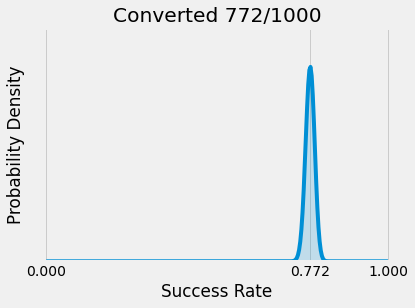

In [329]:
fig, ax = plt.subplots(1,1)
plot_beta_website(bt_dist_leftywins,ax)

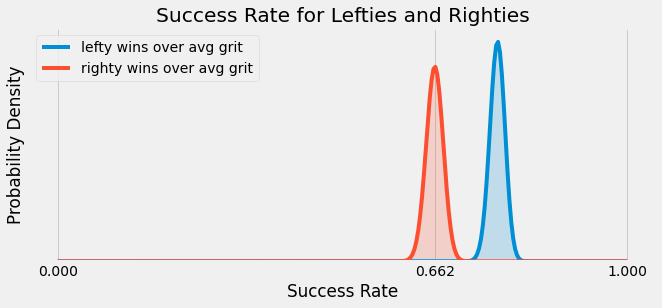

In [330]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_website(bt_dist_leftywins, ax, label="lefty wins over avg grit")
plot_beta_website(bt_dist_rightywins, ax, label="righty wins over avg grit")
ax.set_title('Success Rate for Lefties and Righties')
ax.legend();

Important question: What's the probability that lefties is better than righties?

Let's figure out how much of lefties's Beta distribution is to the right of righties's.

To do this, all we have to do is to take the integral of this function:

𝑓(𝑥)=𝑥𝛼−1(1−𝑥)𝛽−1∗Γ(𝛼)Γ(𝛽) / Γ(𝛼+𝛽)

Where Γ
is, of course the well-known gamma function.


As it turns out, this calculation is somewhat difficult, but we can take a shortcut using Monte Carlo simulation.

We simply draw a large number of random samples from each distribution, and count how many times lefty's samples are greater than righties's.

The code is short and easy:


In [331]:
num_simulations = 10000

alpha, beta = get_beta_dist_params(bt_dist_leftywins)[:2]
print('Lefty Alpha: ',alpha,'Beta: ', beta)
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(bt_dist_rightywins)[:2]
print('Righty Alpha: ',alpha,'Beta: ', beta)
dist_B = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)

print("It is ",(simulated_B < simulated_A).mean()*100,'% likely that lefties score better than righties')

Lefty Alpha:  772 Beta:  228
Righty Alpha:  662 Beta:  338
It is  100.0 % likely that lefties score better than righties


In [ ]:
100 likely on average a sample of lefties scores better than a sample of righties. 

NameError: name 'results' is not defined

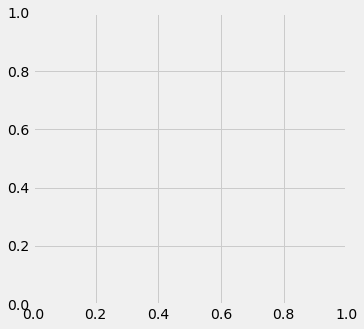

In [32]:
# for the grit using personality traits data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = results.predict(X)
stats.probplot(total_bio2['Total'] - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for Grit Score Residuals")

In [ ]:
fig, ax = plt.subplots()
predictions = results.predict(X)
ax.scatter(predictions,
           total_bio2["Total"] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_title("Residual plot")
ax.set_xlabel('Predicted Grit score with IPIP features')
ax.set_ylabel('Residuals');

In [ ]:
x =total_bio2[['Openness', 'Neuroticism','Conscientiousness', "Extroversion", "Agreeableness"]]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
vif_data.head()



# What I doing 

predicting grit from education level.
predicting grit from time taking test.


1. check if scores are normal from fives most individual traits looked normal exept for neuroticism which was skewed. I then tested for normailty of all the scores sepratly and got that it was not normal. so then I wanted to know why it was not normal and I checked for skewness and it was really skewed. I went back to the IPIP offial website and saw I was scoring the test incorrectly. So once I wrote the simple code to negate some of the questions from the total for each section I was back on track. 
2. Setting up linear regression model for predicting grit score vs big five traits
3. found r^2 is low only 7% of proportion of variance explained by model.
4. Then I did dummy variables for education level. 

visualize outliers 
plot resuduals 



## Inferential linear regression- aka predicting from model

- 5 assumptions needed to do inferential linear regression
    1. Normal
        1. d'agustin and pearson normal test. stats.normaltest(df or arr). look for high p value. low p value fails Ho which is p < a. 

    2. Linear
    3. outliers 
    4. homosecdatisy - variance stays constant
    5. Multicollinearily - the independent variables are not highly correlated with each other
        1. the Variance inflation factor is how you test for this if you need to. VIF
        2. you should remove the biggest VIF and then test again to see if  they lower
        below 10.
    6. 

    - Confounding in Regression.
        - Always graph so you can see if you are making a mistake
        - remember that corelation does not imply causation but only assosiation.
        - ex:

In [ ]:
stats.skewtest(gs_df['Total'])

In [ ]:
y2 = total_bio2["Total"]
X2 = total_bio2[['age',"surveyelapse",1,2,3,4]]
X2 = sm.add_constant(X2)
model = sm.OLS(y2, X2)
results2 = model.fit()
results2.summary()

In [ ]:
# for the grit using time, age, and education data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = results2.predict(X2)
stats.probplot(total_bio2["Total"] - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for grit Score Residuals")

In [ ]:
x2 = total_bio2[['age',"surveyelapse", 1,2,3,4]]
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) 
                          for i in range(len(x2.columns))] 
p_values = pd.DataFrame(results2.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
vif_data.head()

In [ ]:
# mulitcolaniearity. fit asumpition

In [ ]:
y_hat = results.predict(X)
redsiduals = y_hat -y

In [ ]:
fig, ax = plt.subplots()
predictions = results2.predict(X2)
ax.scatter(predictions,
           total_bio2["Total"] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_title('Residual plot')
ax.set_xlabel('Predicted Grit score using age,edu,test time')
ax.set_ylabel('Residuals');

In [ ]:
gs_married = gs_df_married[gs_df_married['married'] == 2]
gs_notmarried = gs_df_married[gs_df_married['married'] == 1]
gs_divorsed = gs_df_married[gs_df_married['married'] == 3]
gs_other = gs_df_married[gs_df_married['married'] == 0]

In [ ]:
print("married avg",gs_married['Total'].mean(), 'std err', stats.sem(gs_married['Total'], ddof=0))
print("other avg",gs_other['Total'].mean(), 'std err', stats.sem(gs_other['Total'], ddof=0))
print("divorsed avg",gs_divorsed['Total'].mean(), "std err", stats.sem(gs_divorsed['Total'], ddof=0))
print('Not married avg',gs_notmarried['Total'].mean(), 'std err', stats.sem(gs_notmarried['Total'], ddof=0))


In [ ]:
stats.normaltest(gs_df['Total'])

In [ ]:
# stop and bootstrap

In [ ]:
def bootstrap(x, resamples=5000):
    bootstrap_samples = []
    for i in range(0,resamples):
        bootstrap_samples.append(np.random.choice(x, size=len(x), replace=True))
    return bootstrap_samples

def bootstrap_stat(bt_sample, stat_function=np.mean):
    mapped_data = []
    for i in range(0,5000):
        bootstrap_sample_stats = stat_function(bt_sample[i])
        mapped_data.append(bootstrap_sample_stats)
    return mapped_data

#bootstrap from each sample.mean of each bootstrap, then subtract mean.
#recorded diffences in means.
bt_gs = bootstrap(gs_df['Total'])
bt_mean_gs = bootstrap_stat(bt_gs)
bt_mean_gs



In [ ]:
stats.normaltest(fives_df['Total'])

In [ ]:
stats.normaltest(bt_mean_gs)

In [ ]:
print('bt gs means avg',np.mean(bt_mean_gs), 'std err', stats.sem(bt_mean_gs, ddof=0))


In [ ]:
variance_of_sample = np.var(bt_gs)
varaince_of_bootstrap_mwans = np.var(bt_mean_gs)

print("Variance of Sample: {:2.2f}".format(variance_of_sample))
print("Variance of Sample means: {:2.2f}".format(varaince_of_bootstrap_medians))



In [ ]:
def bootstrap_ci(bt_sample, ci=95):
    lower = np.percentile(bt_sample , 2.5)
    upper = np.percentile(bt_sample , 97.5)
    return print('the 95th percentile is from' ,lower, upper)

bootstrap_ci(bt_mean_gs, ci=95)

print('the mean of the bootstrap means is',np.mean(bt_mean_gs))

In [ ]:
fig, axs = plt.subplots(1, figsize=(8,8))

axs.hist(bt_mean_gs, bins=100, density=True, color="black", alpha=0.5)
axs.set_title("boostrap sample means for total gs", fontsize=20);

axs.grid()

axs.set_ylabel('Frequency')
axs.set_xlabel('Grit Score')
axs.axvline(30.68338, color='red', linestyle='--')
axs.axvline(30.999763, color='red', linestyle='--')
axs.legend();

In [ ]:
gs_hand = gs_df.join(df['hand'])

In [ ]:
gs_lefty = gs_hand[gs_hand['hand'] == 2] # 432
gs_righty = gs_hand[gs_hand['hand'] == 1] # 3675

In [ ]:
bt_lefty = bootstrap(gs_lefty['Total'])
bt_mean_lefty = bootstrap_stat(bt_lefty)
bt_righty = bootstrap(gs_righty['Total'])
bt_mean_righty = bootstrap_stat(bt_righty)

In [ ]:
means_left = np.subtract(bt_mean_lefty,bt_mean_righty)
def bootstrap_ci(bt_sample, ci=95):
    lower = np.percentile(bt_sample , 2.5)
    upper = np.percentile(bt_sample , 97.5)
    return print('the 95th percentile is from' ,lower, upper)

bootstrap_ci(means_left, ci=95)

print('the mean of the bootstrap means is',np.mean(means_left))

In [ ]:
fig, axs = plt.subplots(1, figsize=(8,8))

axs.hist(means_left, bins=100, density=True, color="black", alpha=0.5)
axs.set_title("Boostrap sample means for lefty-righty in grit Scale", fontsize=20);

axs.grid()

axs.set_ylabel('Frequency')
axs.set_xlabel('Difference in Grit Score means')
axs.axvline(-0.4440281, color='red', linestyle='--')
axs.axvline(0.586857, color='red', linestyle='--')
axs.legend();

our null hypthisis is that mu lefty = mu lefty = 0 
our alt hypthisis is that mu lefty > 0

 SO we can't really say that there is a difference in means. becuase zero is in our 95th percentile confidence interval.

In [ ]:
gs_married = gs_df_married[gs_df_married['married'] == 2]
gs_notmarried = gs_df_married[gs_df_married['married'] == 1]
gs_divorsed = gs_df_married[gs_df_married['married'] == 3]
gs_other = gs_df_married[gs_df_married['married'] == 0]

In [ ]:
bt_married = bootstrap(gs_married['Total'])
bt_mean_married = bootstrap_stat(bt_married)
bt_notmarried = bootstrap(gs_notmarried['Total'])
bt_mean_notmarried = bootstrap_stat(bt_righty)

In [ ]:
means_married = np.subtract(bt_mean_married,bt_mean_notmarried)
def bootstrap_ci(bt_sample, ci=95):
    lower = np.percentile(bt_sample , 2.5)
    upper = np.percentile(bt_sample , 97.5)
    return print('the 95th percentile is from' ,lower, upper)

bootstrap_ci(means_married, ci=95)

print('the mean of the bootstrap means is',np.mean(means_left))

In [ ]:
fig, axs = plt.subplots(1, figsize=(8,8))

axs.hist(means_married, bins=100, density=True, color="black", alpha=0.5)
axs.set_title("Boostrap sample means for married - not-married in grit Scale", fontsize=20);

axs.grid()

axs.set_ylabel('Frequency')
axs.set_xlabel('Difference in Grit Score means')
axs.axvline(-0.520330550, color='red', linestyle='--')
axs.axvline(0.36865599, color='red', linestyle='--');

In [ ]:
plt.hist(gs_married['Total'])

In [ ]:
dist_ha = stats.norm(30.80151515,0.20901952)
dist_ho = stats.norm(30.8647430, 0.0917028)
fig, ax = plt.subplots(1,1, figsize=(15,4))
#x = np.linspace(dist_ho.ppf(.01),dist_ha.ppf(.99),100)
x = np.linspace(30,32,100)
y_ha = dist_ha.pdf(x)
y_ho = dist_ho.pdf(x)
ax.plot(x,y_ha, label='Ha')
ax.plot(x,y_ho, label='Ho')

ax.set_title('Ho and Ha Distirbution of grit score for married vs non-married')
ax.grid()

ax.set_ylabel('Frequency')
ax.set_xlabel('Grit Score')
ax.axvline(dist_ho.ppf(.025), color='red', linestyle='--')
ax.axvline(dist_ho.ppf(.985), color='red', linestyle='--')
ax.legend();

In [ ]:
samples = dist_ha.rvs(1000)

#p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)

stats.ttest_ind(gs_married['Total'],gs_notmarried['Total'])

In [ ]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

test_statistic = welch_test_statistic(gs_married['Total'], gs_notmarried['Total'])
print("Welch Test Statistic: {:2.2f}".format(test_statistic))


Does being lefty effect grit? 

hand "What hand do you use to write with?" 1=Right, 2=Left, 3=Both
we have 432 lefties
we have 3675 righties 
we expect statistically that 10% of the pop is lefty and our data set shows .11 or 11% of lefties so lefties are well represented in this sample. 


my null hypothisis is that there is no difference in the average grit score of lefty and right handed people. $\mu_\text{lefty} = \mu_\text{righty}$
my alt hypothisis is that lefty people have more grit $\mu_\text{lefty} > \mu_\text{righty}$ 

I checked that the grit scores are normally distributed and they are. I then calculated the Welch Teststatistic=-0.29, and the pvalue=0.771. with a p value higher than our significance level. This means that the probabilty under the null is extemly high therfore we can not reject our null hypthesis. Our data does not support the hypthisis that lefty people have more grit. cool


#sudo continous
do cdf for lefty ,righty

In [ ]:
gs_hand = gs_df.join(df['hand'])

In [ ]:
gs_hand.head()

In [ ]:
gs_lefty = gs_hand[gs_hand['hand'] == 2] # 432
gs_righty = gs_hand[gs_hand['hand'] == 1] # 3675

In [ ]:
432/3675
plt.hist(gs_lefty['Total'])


In [ ]:
print("lefty avg",gs_lefty['Total'].mean(), 'std err', stats.sem(gs_lefty['Total'], ddof=0))
print("righty avg",gs_righty['Total'].mean(), 'std err', stats.sem(gs_righty['Total'], ddof=0))

In [ ]:
print(stats.normaltest(gs_lefty['Total']))
stats.normaltest(gs_righty['Total'])

In [ ]:
# we got that lefty is not normal ....

stats.ttest_ind(gs_righty['Total'],gs_lefty['Total'])

In [ ]:
plt.hist(gs_righty['Total'])

In [ ]:
gs_lefty.

In [ ]:
alpha = 0.05
k2, p = stats.normaltest(gs_lefty['Total'])
if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

In [ ]:
dist_ha = stats.norm(30.949074074074073,0.24735916183298537)
dist_ho = stats.norm(30.871020408163265, 0.08746463076762144)
fig, ax = plt.subplots(1,1, figsize=(15,4))
#x = np.linspace(dist_ho.ppf(.01),dist_ha.ppf(.99),100)
x = np.linspace(30,32,100)
y_ha = dist_ha.cdf(x)
y_ho = dist_ho.cdf(x)
ax.plot(x,y_ha, label='lefty')
ax.plot(x,y_ho, label='righty')

ax.set_title('Distirbution of grit scores for righty and lefty ')
ax.grid()
ax.legend()

In [ ]:
gs_df_droptotal = gs_df.drop('Total', axis=1)

In [ ]:
gs_df_droptotal.corr()

In [ ]:
#Gs7 GS5, gs5 gs8 , gs8 gs7, gs6 gs12

#GS7 I often set a goal but later choose to pursue a different one.
#GS8 I have difficulty maintaining my focus on projects that take more than a few months to complete.

In [ ]:
def bootstrap(x, resamples=5000):
    bootstrap_samples = []
    for i in range(0,resamples):
        bootstrap_samples.append(np.random.choice(x, size=len(x), replace=True))
    return bootstrap_samples

#bootstrap from each sample.mean of each bootstrap, then subtract mean.
#recorded diffences in means.
bt_gs = bootstrap(gs_df['Total'])

